In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle
import pandas as pd

plt.rcParams["figure.figsize"] = (10,8)

In [2]:
infile = open("qcd_100000_pt_1000_1200.pkl",'rb')
bkg = pickle.load(infile)
infile = open("higgs_100000_pt_1000_1200.pkl",'rb')
signal = pickle.load(infile)
high_lumi = pd.read_hdf('data_highLumi_pt_1000_1200.h5')
low_lumi = pd.read_hdf('data_lowLumi_pt_1000_1200.h5')

In [3]:
n_qcd = 2000
n_higgs = 50
bkg_weight = len(high_lumi)/(len(bkg))/(1+n_higgs/n_qcd)
signal_weight = len(high_lumi)/(len(bkg))/(1+n_qcd/n_higgs)
weights=[[bkg_weight for i in range(len(bkg))], [signal_weight for i in range(len(signal))]]

In [4]:
def cut(df):
    """
    applies optimal cuts to a dataset
    """
    df = df[(df['mass'] <= 141.5) & (df['mass'] >= 115)]
    df = df[df['ee2'] <=0.075]
    df = df[df['angularity'] <= 0.005]
    df = df[(df['t1'] <= 1.5)]
    df = df[(df['t2'] <= 0.6)]
    df = df[(df['t3'] <= 0.5)]
    df = df[(df['t21'] <= 0.65)]
    df = df[(df['KtDeltaR'] <= 0.375) & (df['KtDeltaR'] >= 0.125)]
    return df

### 1.

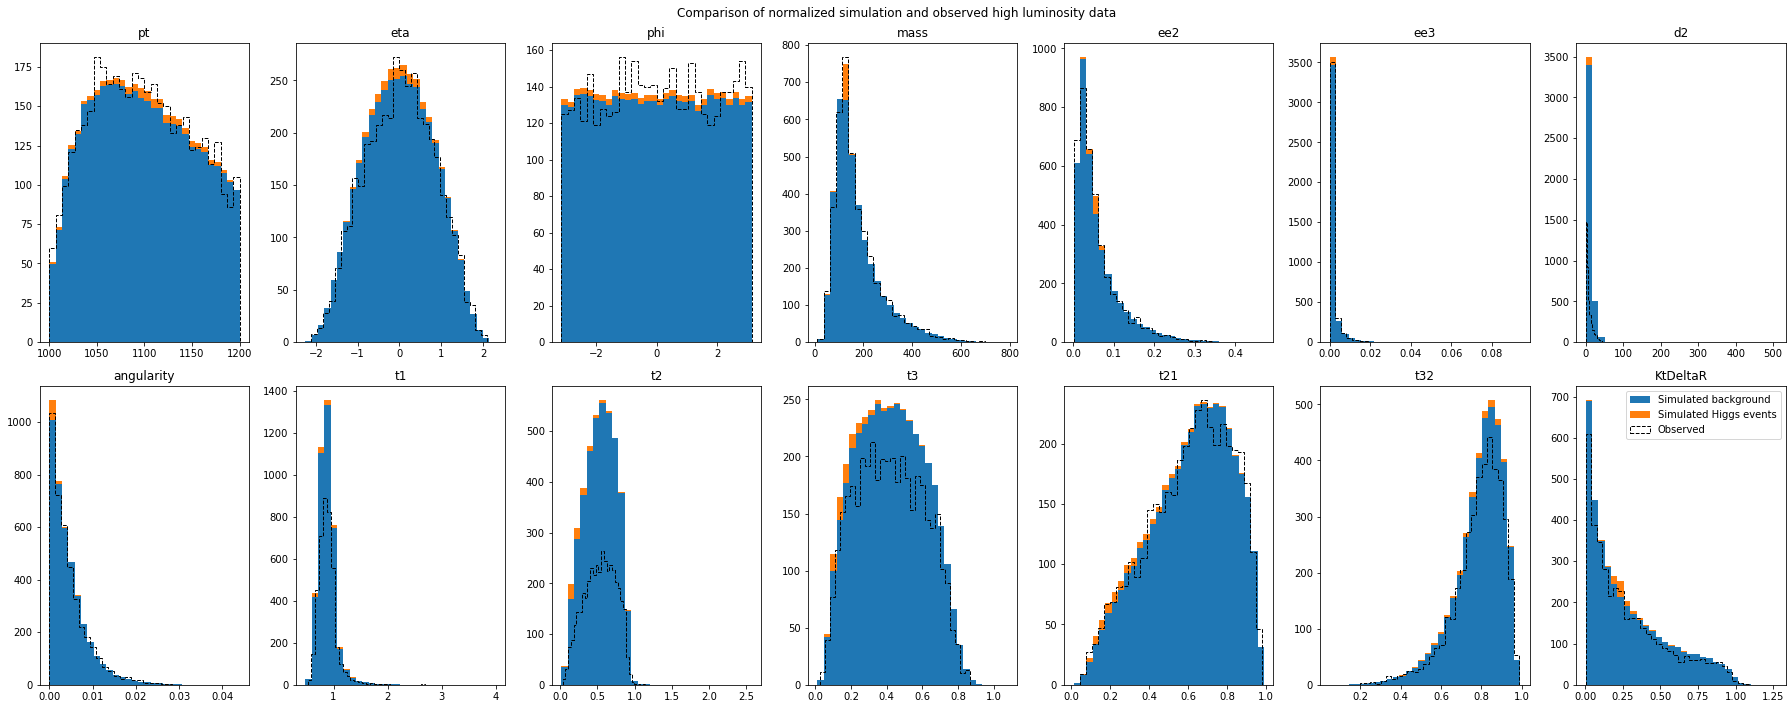

In [5]:
fig, ax = plt.subplots(2,7,figsize=(25,10))

for i in range(0,7):
    j = i+7
    column1 = bkg.columns[i]
    column2 = bkg.columns[j]
    ax[0,i].hist([bkg[column1],signal[column1]], label=['Simulated background', 'Simulated Higgs events'], stacked=True, weights=weights, bins=30)
    ax[0,i].hist(high_lumi[column1], bins=30, histtype='step', linestyle='--', label='Observed', color='k')
    ax[1,i].hist([bkg[column2],signal[column2]], label=['Simulated background', 'Simulated Higgs events'], stacked=True, weights=weights, bins=30)
    ax[1,i].hist(high_lumi[column2], bins=30, histtype='step', color='k', linestyle='--', label='Observed')
    ax[0,i].set_title(column1)
    ax[1,i].set_title(column2)
plt.suptitle('Comparison of normalized simulation and observed high luminosity data')
plt.legend()
plt.tight_layout()

We apply the cuts, recalculate the weights, and then plot again.

In [6]:
bkg2 = cut(bkg)
signal2= cut(signal)
high_lumi2= cut(high_lumi)
bkg_weight2 = len(high_lumi2)/(len(bkg2))/(1+n_higgs/n_qcd)
signal_weight2= len(high_lumi2)/(len(bkg2))/(1+n_qcd/n_higgs)
weights2=[[bkg_weight2 for i in range(len(bkg2))], [signal_weight2 for i in range(len(signal2))]]

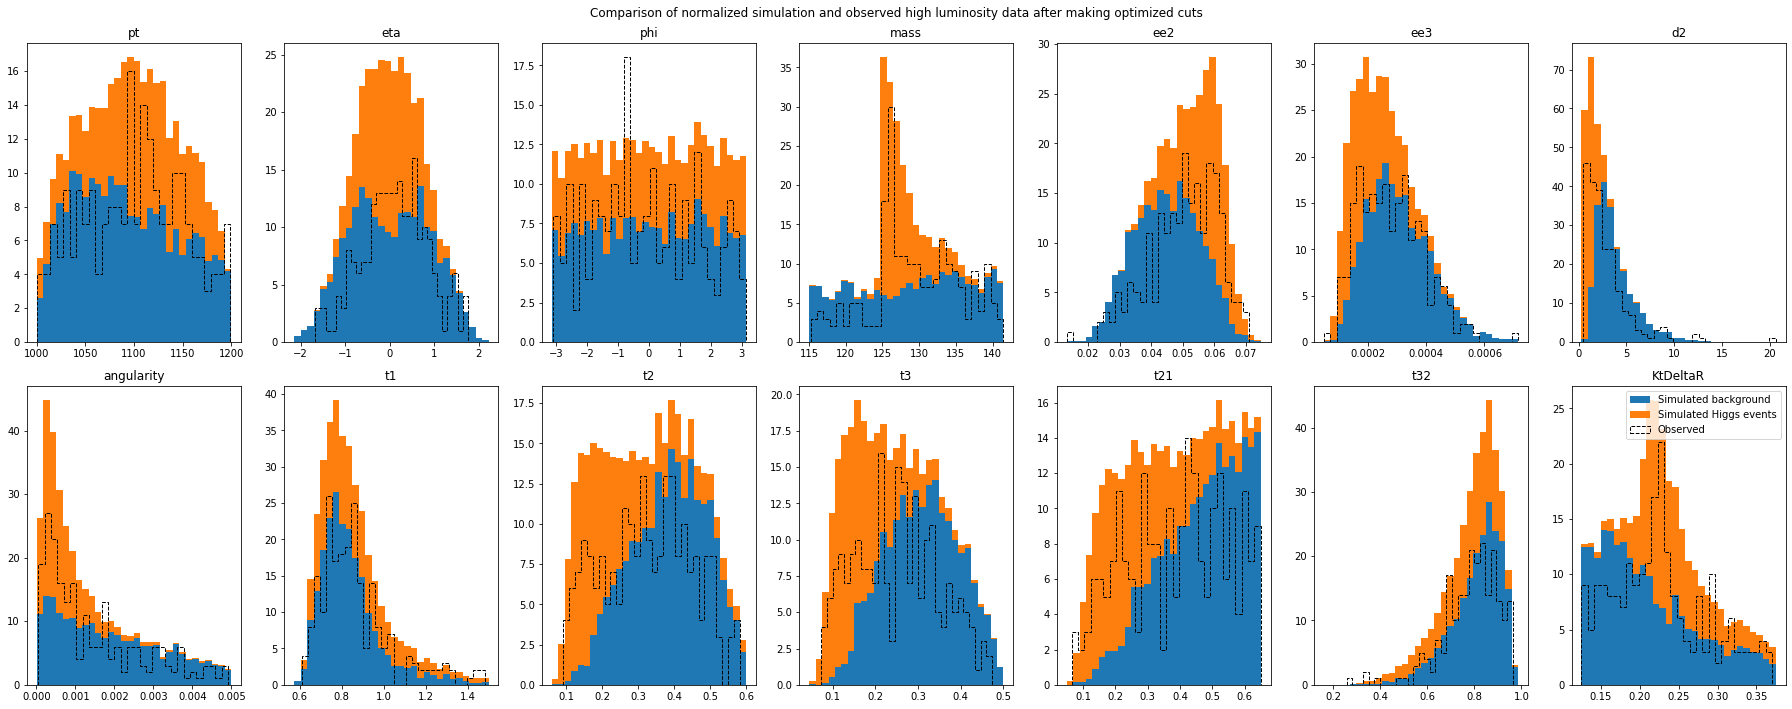

In [7]:
fig, ax = plt.subplots(2,7,figsize=(25,10))

for i in range(0,7):
    j = i+7
    column1 = bkg.columns[i]
    column2 = bkg.columns[j]
    ax[0,i].hist([bkg2[column1],signal2[column1]], label=['Simulated background', 'Simulated Higgs events'], stacked=True, weights=weights2, bins=30)
    ax[0,i].hist(high_lumi2[column1], bins=30, histtype='step', color='k', linestyle='--', label='Observed')
    ax[1,i].hist([bkg2[column2],signal2[column2]], label=['Simulated background', 'Simulated Higgs events'], stacked=True, weights=weights2, bins=30)
    ax[1,i].hist(high_lumi2[column2], bins=30, histtype='step', color='k', linestyle='--', label='Observed')
    ax[0,i].set_title(column1)
    ax[1,i].set_title(column2)
plt.suptitle('Comparison of normalized simulation and observed high luminosity data after making optimized cuts')
plt.legend()
plt.tight_layout()

After making our cuts, we can find our expected signal-free distribution as a Poisson distribution which a mean of the ratio of remaining and initial background counts applied to the starting number of observed counts. We then find the significance of finding the counts remaining of the observation after making the same cuts if that background distribution is what we expect with no signal.

In [8]:
mu = len(high_lumi)*len(bkg2)/len(bkg)
p = stats.poisson.sf(len(high_lumi2),mu=mu)
print(f'With a number of observed counts of {len(high_lumi2)} and an expected background mean of {mu}, we get a signficance of {stats.norm.isf(p):0.3f} sigma')

With a number of observed counts of 220 and an expected background mean of 114.98648, we get a signficance of 8.737 sigma


This would be well beyond a confirmed signal, which would require $5 \sigma$ or more.

### 2.

In [9]:
low_bkg_weight = len(low_lumi)/(len(bkg))/(1+n_higgs/n_qcd)
low_signal_weight = len(low_lumi)/(len(signal))/(1+n_qcd/n_higgs)
low_weights=[[low_bkg_weight for i in range(len(bkg))], [low_signal_weight for i in range(len(signal))]]

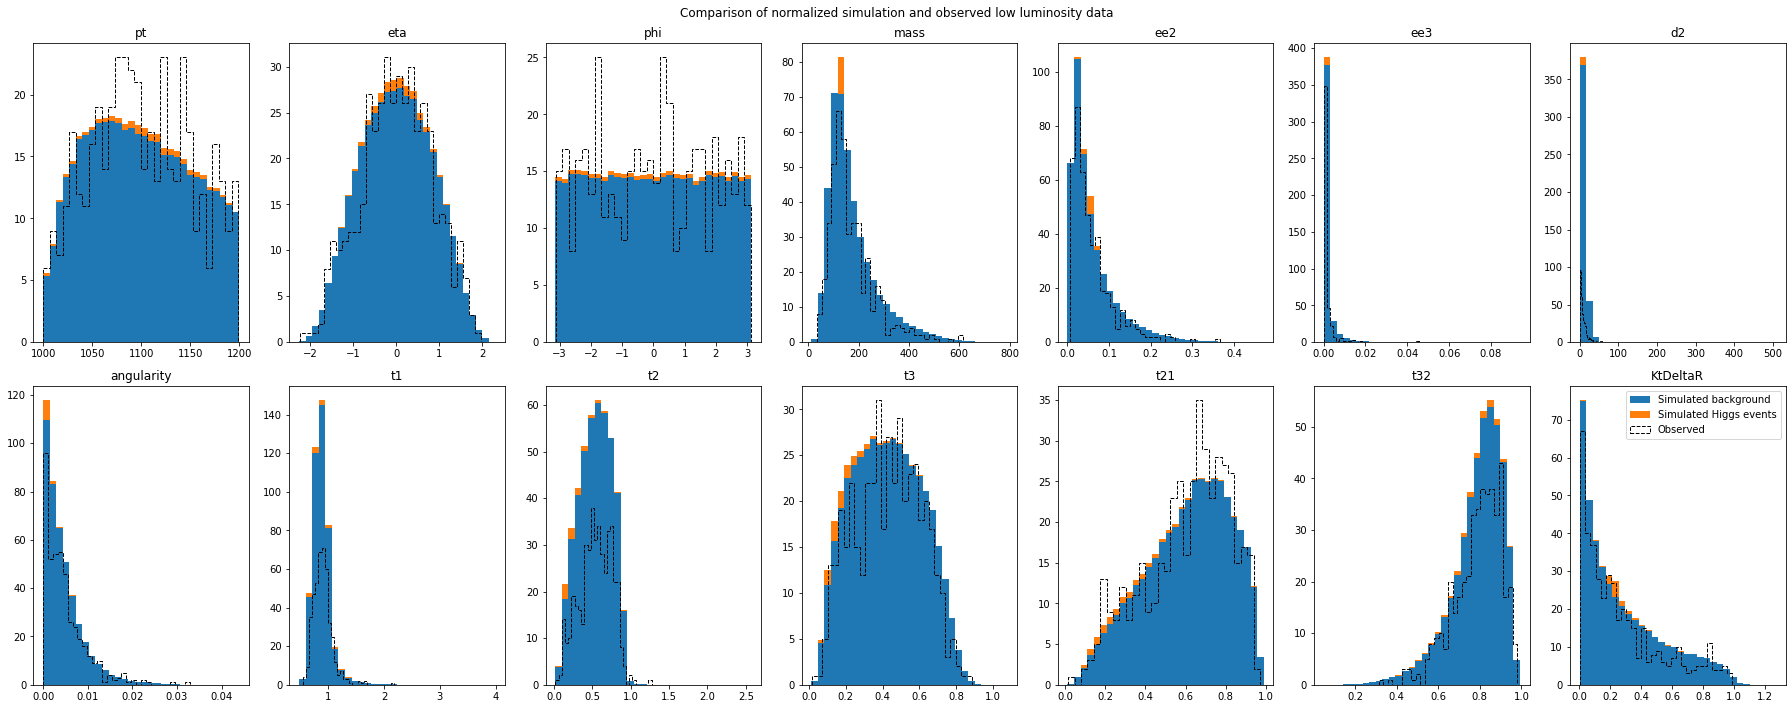

In [10]:
fig, ax = plt.subplots(2,7,figsize=(25,10))

for i in range(0,7):
    j = i+7
    column1 = bkg.columns[i]
    column2 = bkg.columns[j]
    ax[0,i].hist([bkg[column1],signal[column1]], label=['Simulated background', 'Simulated Higgs events'], stacked=True, weights=low_weights, bins=30)
    ax[0,i].hist(low_lumi[column1], bins=30, histtype='step', color='k', linestyle='--', label='Observed')
    ax[1,i].hist([bkg[column2],signal[column2]], label=['Simulated background', 'Simulated Higgs events'], stacked=True, weights=low_weights, bins=30)
    ax[1,i].hist(low_lumi[column2], bins=30, histtype='step', color='k', linestyle='--', label='Observed')
    ax[0,i].set_title(column1)
    ax[1,i].set_title(column2)
plt.suptitle('Comparison of normalized simulation and observed low luminosity data')
plt.legend()
plt.tight_layout()

In [11]:
low_lumi2= cut(low_lumi)
bkg_weight3 = len(low_lumi2)/(len(bkg2))/(1+n_higgs/n_qcd)
signal_weight3= len(low_lumi2)/(len(bkg2))/(1+n_qcd/n_higgs)
weights3=[[bkg_weight3 for i in range(len(bkg2))], [signal_weight3 for i in range(len(signal2))]]

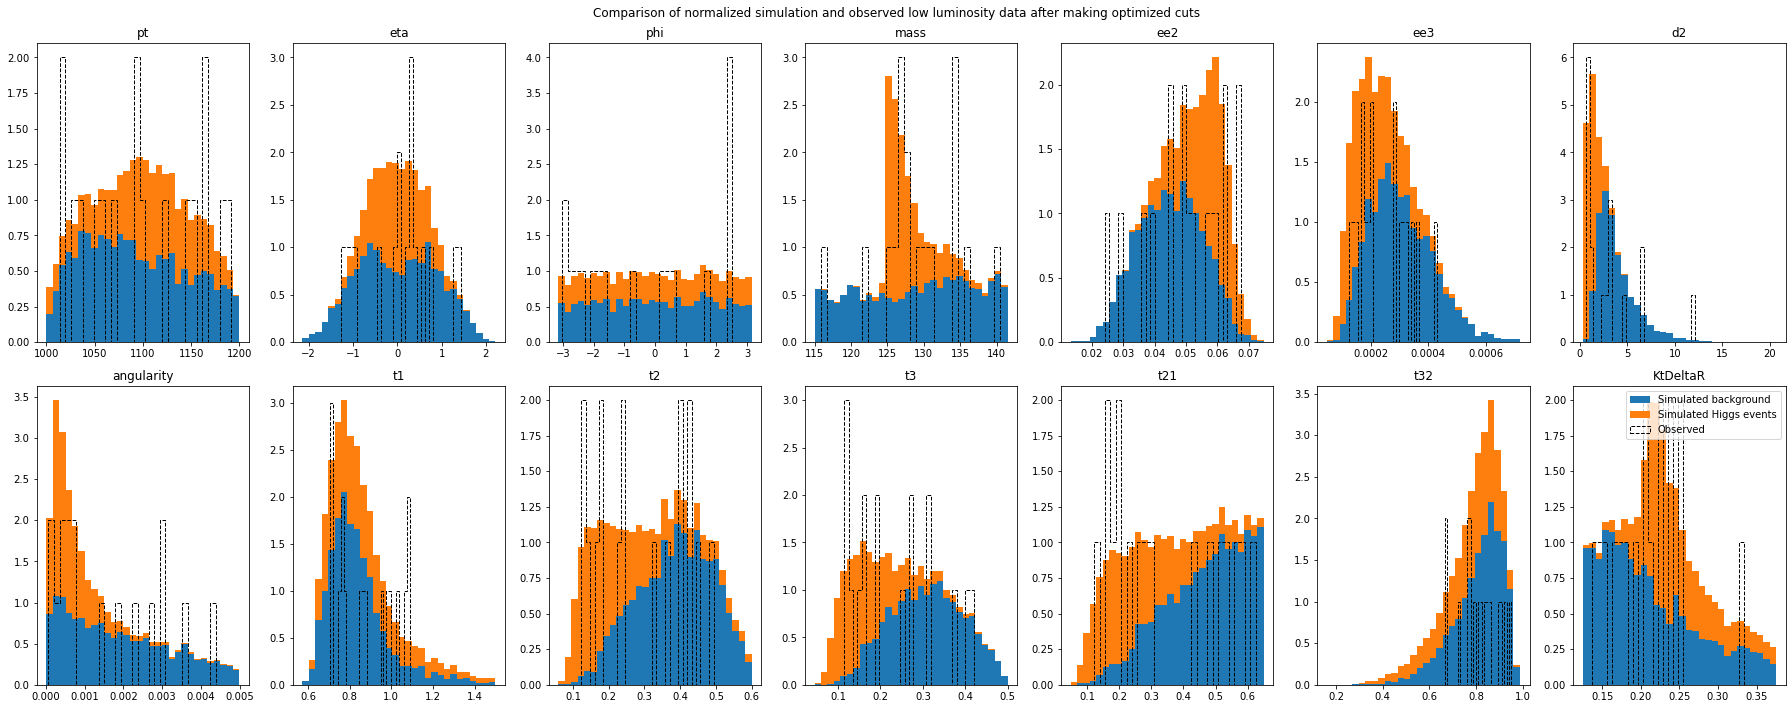

In [12]:
fig, ax = plt.subplots(2,7,figsize=(25,10))

for i in range(0,7):
    j = i+7
    column1 = bkg.columns[i]
    column2 = bkg.columns[j]
    ax[0,i].hist([bkg2[column1],signal2[column1]], label=['Simulated background', 'Simulated Higgs events'], stacked=True, weights=weights3, bins=30)
    ax[0,i].hist(low_lumi2[column1], bins=30, histtype='step', color='k', linestyle='--', label='Observed')
    ax[1,i].hist([bkg2[column2],signal2[column2]], label=['Simulated background', 'Simulated Higgs events'], stacked=True, weights=weights3, bins=30)
    ax[1,i].hist(low_lumi2[column2], bins=30, histtype='step', color='k', linestyle='--', label='Observed')
    ax[0,i].set_title(column1)
    ax[1,i].set_title(column2)
plt.suptitle('Comparison of normalized simulation and observed low luminosity data after making optimized cuts')
plt.legend()
plt.tight_layout()

In the high luminosity case, the observed distribution roughly follows the distribution of the signal + background. In the low luminosity case, the distributions are similar, but the observations vary much more, with some values higher or lower than the simulated data. On the other hand, after making the cuts the observed low luminosity distribution doesn't seem to have any correlation with the simulated data, except for ee3, d2, and KtDeltaR, while the high luminosity still has the same general shape.

We find the significance just as before but with the count of the low luminosity after cuts.

In [13]:
mu = len(low_lumi)*len(bkg2)/len(bkg)
p = stats.poisson.sf(len(low_lumi2),mu=mu)
print(f'With a number of observed counts of {len(low_lumi2)} and an expected background mean of {mu}, we get a signficance of {stats.norm.isf(p):0.3f} sigma')

With a number of observed counts of 17 and an expected background mean of 12.49976, we get a signficance of 1.378 sigma


This is far below that of the high lumoninosity data, and not nearly high enough to confirm a signal.

### 3.

We'll start by plotting a histogram showing the probability of true signals for observed signals.

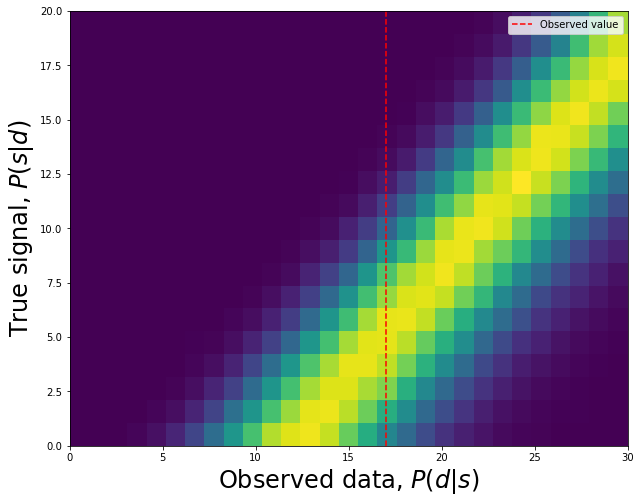

In [59]:
background = stats.poisson.rvs(mu=12.5, size=1000000)
true_signal = stats.uniform.rvs(loc=0, scale=25, size=1000000)
observed = background + true_signal

signaledges = np.linspace(0,20,20)
dataedges = np.linspace(0,30,30)

Psd, temp, temp2= np.histogram2d(observed,true_signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T, shading='auto')
plt.axvline(17, color='red', linestyle='--', label='Observed value')
#plt.axvline(12.5, color='orange', linestyle='--', label='Expected value')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.legend()
plt.show()

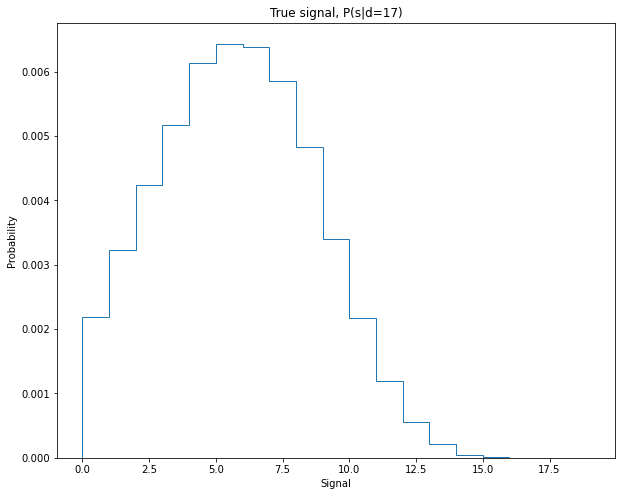

In [47]:
plt.stairs(Psd[17])
plt.title('True signal, P(s|d=17)')
plt.xlabel('Signal')
plt.ylabel('Probability')
plt.show()

In [61]:
print(f'With an expected background of ~12.5, we would expect to get a value of {stats.poisson.ppf(.95, 12.5)} 95% of the time,'
      + f' so {stats.poisson.ppf(.95, 12.5)} is our expected 95% confidence level upper limit.')

With an expected background of ~12.5, we would expect to get a value of 19.0 95% of the time, so 19.0 is our expected 95% confidence level upper limit.


In [62]:
print(f'With an expected background of ~12.5, the observed value of 17 could be explained 95% of the time by a signal of {stats.poisson.ppf(.95, 5.5)},'
      + f' so {stats.poisson.ppf(.95, 5.5)} is our observed 95% confidence level upper limit.')

With an expected background of ~12.5, the observed value of 17 could be explained 95% of the time by a signal of 10.0, so 10.0 is our observed 95% confidence level upper limit.
